0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1 Surface(profile=Spherical(c=0.018177852104995274), interact_mode='transmit')
2 Surface(profile=Spherical(c=-0.012780532692602627), interact_mode='transmit')
3 Surface(profile=Spherical(c=-0.013038149625805106), interact_mode='transmit')
4 Surface(profile=Spherical(c=0.004825742440474467), interact_mode='transmit')
5 Surface(profile=Spherical(c=0.023143862247731902), interact_mode='transmit')
6 Surface(profile=Spherical(c=0.007500018750046875), interact_mode='transmit')
7 Surface(profile=Spherical(c=0.0), interact_mode='transmit')
8 Surface(profile=Spherical(c=-0.05070479667376533), interact_mode='transmit')
9 Surface(profile=Spherical(c=-0.0032727225124036187), interact_mode='transmit')
10 Surface(profile=Spherical(c=0.008181833057878287), interact_mode='transmit')
11 Surface(profile=Spherical(c=-0.01109791692099393), interact_mode='transmit')
12 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')
0

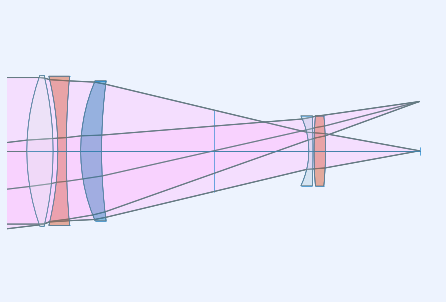

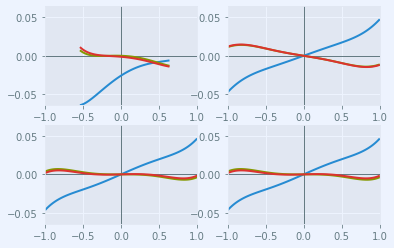

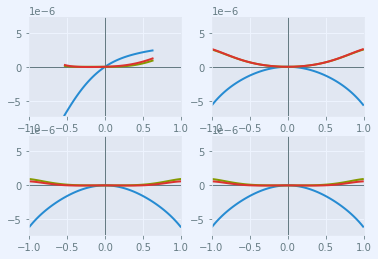

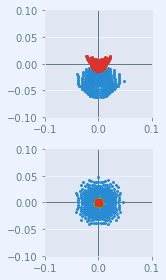

In [1]:
%matplotlib inline
isdark = False
from rayoptics.environment import *
from rayoptics.elem.elements import Element
from rayoptics.raytr.trace import apply_paraxial_vignetting

# US 4,338,001 Example 2
# Obtained via https://www.photonstophotos.net/GeneralTopics/Lenses/OpticalBench/OpticalBenchHub.htm

# Surface[1] = type=S radius=55.012 thickness=6.389 diameter = 36.74 nd = 1.50032 vd = 81.9
# Surface[2] = type=S radius=-78.244 thickness=1.167 diameter = 36.74 nd = 0 vd = 0
# Surface[3] = type=S radius=-76.698 thickness=2.056 diameter = 36.4 nd = 1.7495 vd = 35
# Surface[4] = type=S radius=207.222 thickness=3.5 diameter = 36.4 nd = 0 vd = 0
# Surface[5] = type=S radius=43.208 thickness=5.111 diameter = 34.14 nd = 1.65844 vd = 50.8
# Surface[6] = type=S radius=133.333 thickness=27.339 diameter = 34.14 nd = 0 vd = 0
# Surface[7] = type=AS radius=0 thickness=23.161 diameter = 19.854 nd = 0 vd = 0
# Surface[8] = type=S radius=-19.722 thickness=1 diameter = 17.06 nd = 1.51454 vd = 54.6
# Surface[9] = type=S radius=-305.556 thickness=0.278 diameter = 17.06 nd = 0 vd = 0
# Surface[10] = type=S radius=122.222 thickness=2.778 diameter = 17.16 nd = 1.79668 vd = 45.4
# Surface[11] = type=S radius=-90.107 thickness=22.92 diameter = 17.16 nd = 0 vd = 0

opm = OpticalModel()
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model
osp.pupil = PupilSpec(osp, key=['image', 'f/#'], value=2.8)
osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0., 6.8])
osp.spectral_region = WvlSpec([(486.1327, 0.5), (587.5618, 1.0), (656.2725, 0.5)], ref_wl=1)
opm.system_spec.title = 'US 4,338,001 Example 2'
opm.system_spec.dimensions = 'MM'
opm.radius_mode = True
sm.gaps[0].thi=1e10
sm.add_surface([55.012,6.389,1.50032,81.9])
sm.ifcs[sm.cur_surface].max_aperture = 18.37
sm.add_surface([-78.244,1.167])
sm.ifcs[sm.cur_surface].max_aperture = 18.37
sm.add_surface([-76.698,2.056,1.7495,35])
sm.ifcs[sm.cur_surface].max_aperture = 18.2
sm.add_surface([207.222,3.5])
sm.ifcs[sm.cur_surface].max_aperture = 18.2
sm.add_surface([43.208,5.111,1.65844,50.8])
sm.ifcs[sm.cur_surface].max_aperture = 17.07
sm.add_surface([133.333,27.339])
sm.ifcs[sm.cur_surface].max_aperture = 17.07
sm.add_surface([0,23.161])
sm.set_stop()
sm.ifcs[sm.cur_surface].max_aperture = 9.927
sm.add_surface([-19.722,1,1.51454,54.6])
sm.ifcs[sm.cur_surface].max_aperture = 8.53
sm.add_surface([-305.556,0.278])
sm.ifcs[sm.cur_surface].max_aperture = 8.53
sm.add_surface([122.222,2.778,1.79668,45.4])
sm.ifcs[sm.cur_surface].max_aperture = 8.58
sm.add_surface([-90.107,22.92])
sm.ifcs[sm.cur_surface].max_aperture = 8.58
sm.list_surfaces()
sm.list_gaps()
sm.do_apertures = False
opm.update_model()
apply_paraxial_vignetting(opm)
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, do_draw_rays=True, do_paraxial_layout=False,
                        is_dark=isdark).plot()
sm.list_model()
# List the optical specifications
pm.first_order_data()
# List the paraxial model
pm.list_lens()
# Plot the transverse ray aberrations
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='Ray', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot the wavefront aberration
wav_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='OPD', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot spot diagrams
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm,
                      scale_type=Fit.User_Scale, user_scale_value=0.1, is_dark=isdark).plot()
